# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]


# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.min(y_train)+np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [14]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

def visualize_dataset(features,labels,signnames,label_no):
    label_name = signnames.index[label_no]
    print('class %s: %s' %(label_no, label_name))
    n_img_to_visual=20
    n_row_plot  = 2
    n_col_plot = int(n_img_to_visual/n_row_plot)
    index = np.where(labels==label_no)
    label_indexes = index[0][0:n_img_to_visual]
    
    #fig = plt.figure()
    fig = plt.figure(figsize = (n_col_plot, n_row_plot))
    plot_count = 0
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(n_col_plot*n_row_plot):
        ax = fig.add_subplot(n_row_plot, n_col_plot, plot_count+1)
        ax.axis('off')
        plot_count += 1
        idx = label_indexes[i]
        img =  np.squeeze(features[idx,:,:,:])
        if img.ndim==2:
            plt.imshow(img, cmap=cm.gray)
        else:
            plt.imshow(img)
            
    plt.show()

    
def visualize_all_dataset(features,labels,signnames,n_classes):
    n_img_to_visual= n_classes
    n_row_plot  = 8
    n_col_plot = int(n_img_to_visual/n_row_plot)+1    
    fig = plt.figure(figsize = (2*n_col_plot, 2*n_row_plot))
    plot_count = 0
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i in range(n_classes):
        ax = fig.add_subplot(n_row_plot, n_col_plot, plot_count+1)
        ax.axis('off')
        plot_count += 1
        index = np.where(labels==i)
        idx = index[0][0:1]
        img =  np.squeeze(features[idx,:,:,:])
        if img.ndim==2:
            plt.imshow(img, cmap=cm.gray)
        else:
            plt.imshow(img)
        plt.title('class %s' %i)
            
    plt.show()



In [1]:
#read the traffic sign name mapping
import pandas as pd
signnames = pd.read_csv('signnames.csv', index_col='SignName')

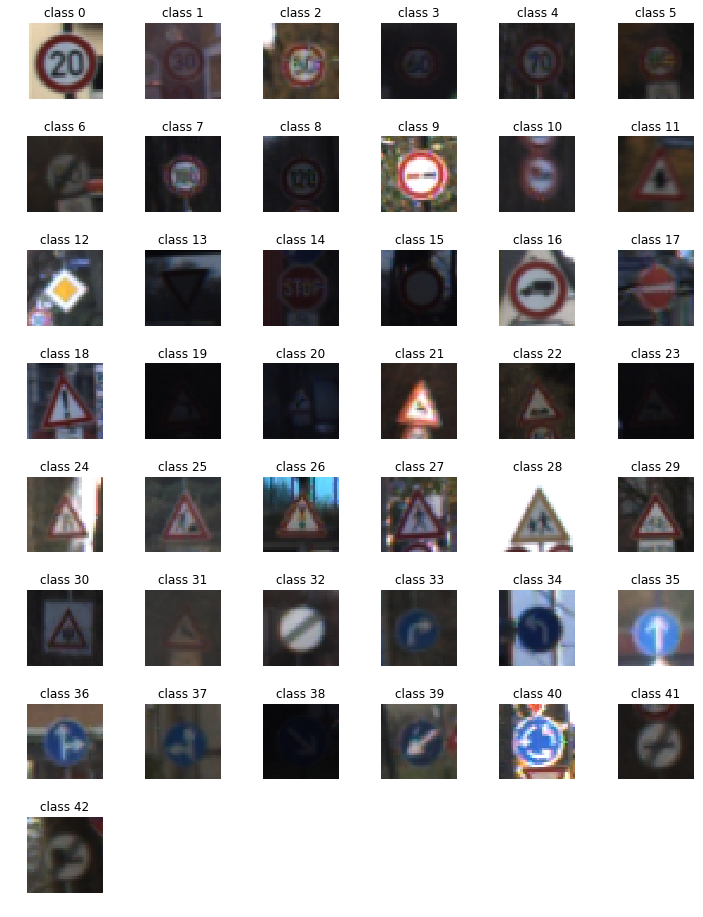

In [15]:
visualize_all_dataset(X_train,y_train,signnames,n_classes)

class 0: Speed limit (20km/h)


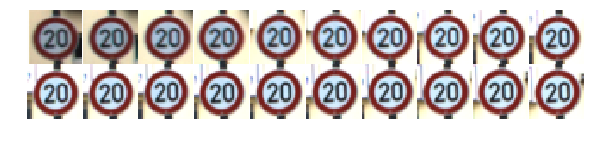

class 1: Speed limit (30km/h)


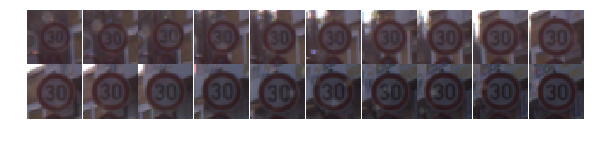

class 2: Speed limit (50km/h)


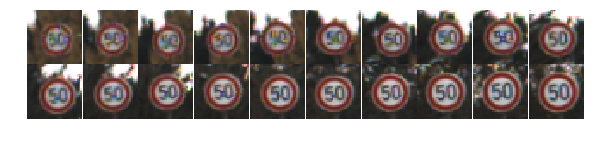

class 3: Speed limit (60km/h)


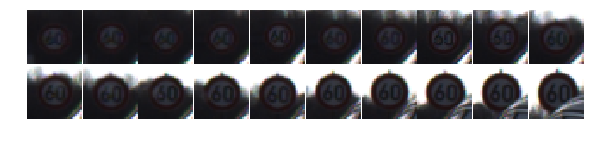

class 4: Speed limit (70km/h)


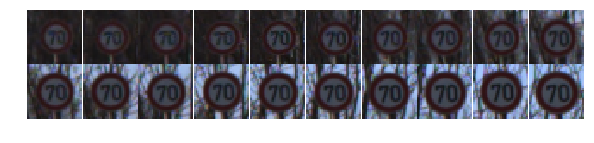

class 5: Speed limit (80km/h)


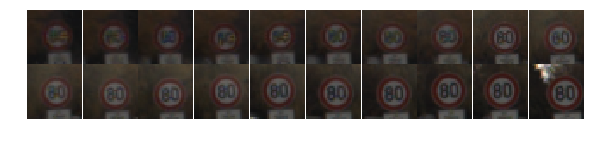

class 6: End of speed limit (80km/h)


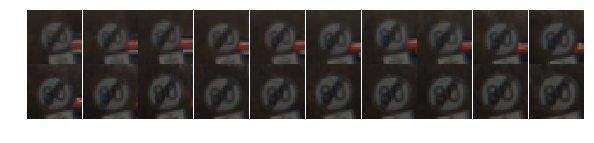

class 7: Speed limit (100km/h)


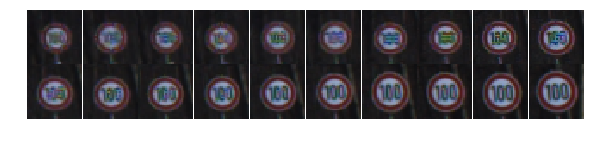

class 8: Speed limit (120km/h)


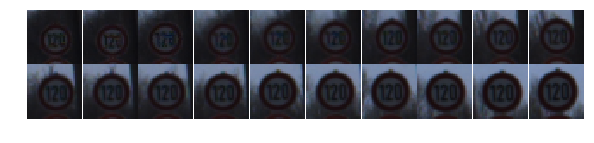

class 9: No passing


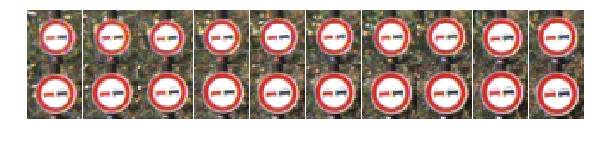

class 10: No passing for vehicles over 3.5 metric tons


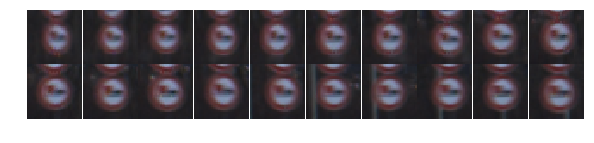

class 11: Right-of-way at the next intersection


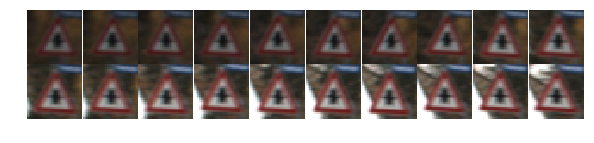

class 12: Priority road


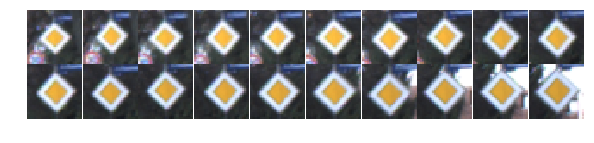

class 13: Yield


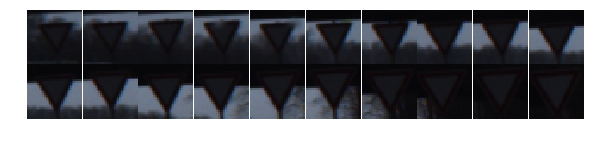

class 14: Stop


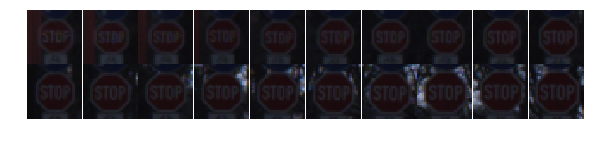

class 15: No vehicles


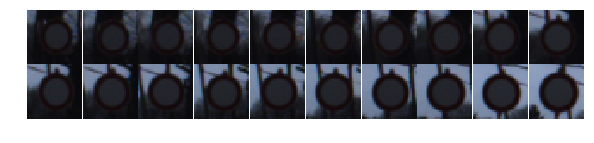

class 16: Vehicles over 3.5 metric tons prohibited


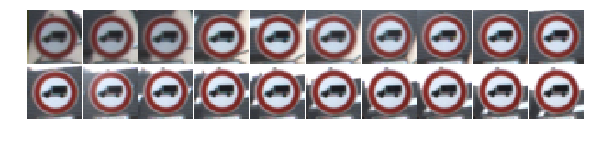

class 17: No entry


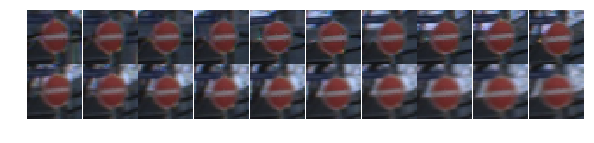

class 18: General caution


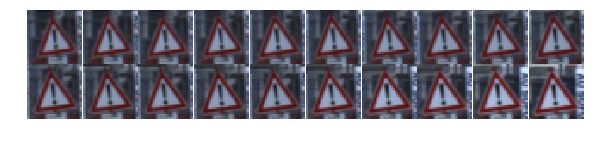

class 19: Dangerous curve to the left


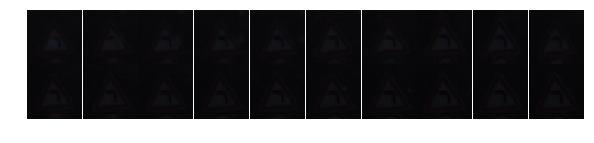

class 20: Dangerous curve to the right


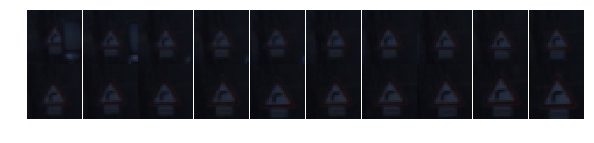

class 21: Double curve


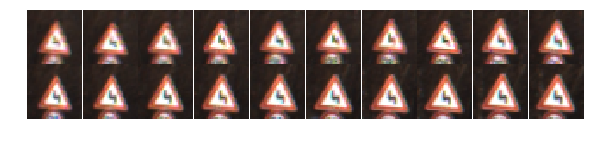

class 22: Bumpy road


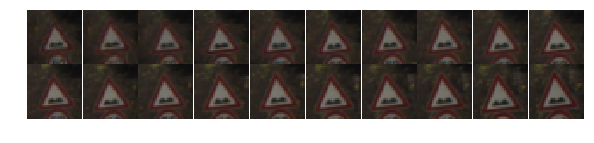

class 23: Slippery road


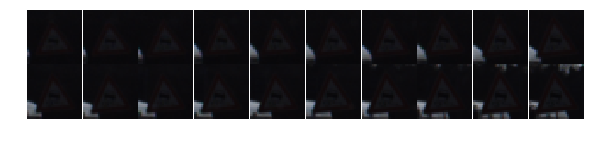

class 24: Road narrows on the right


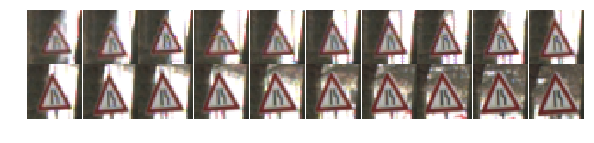

class 25: Road work


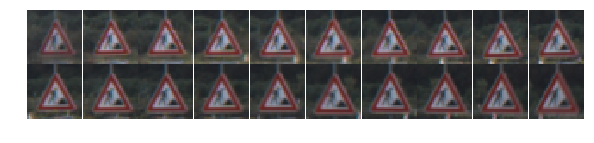

class 26: Traffic signals


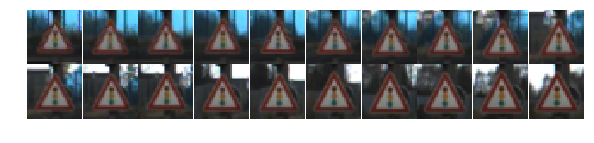

class 27: Pedestrians


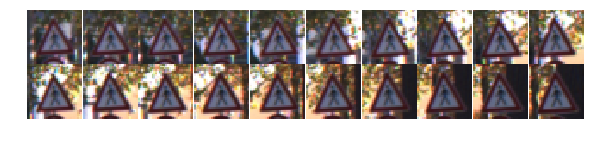

class 28: Children crossing


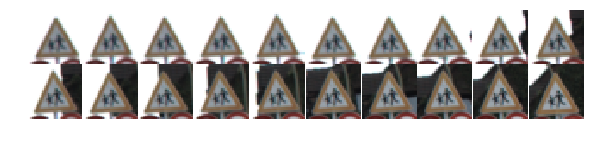

class 29: Bicycles crossing


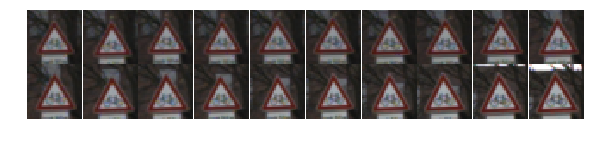

class 30: Beware of ice/snow


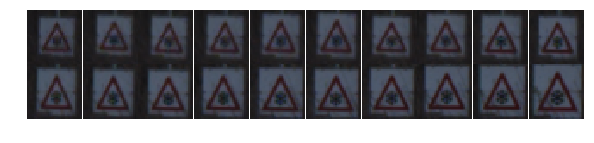

class 31: Wild animals crossing


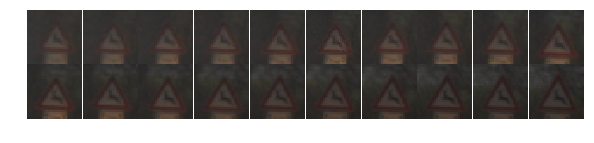

class 32: End of all speed and passing limits


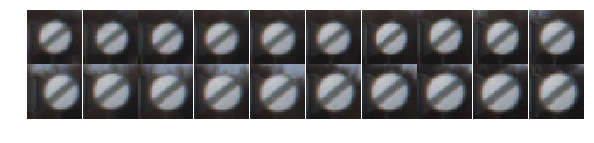

class 33: Turn right ahead


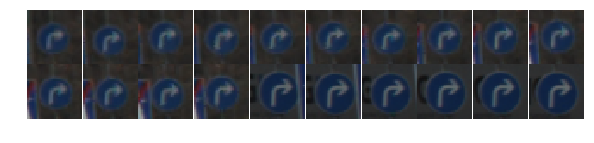

class 34: Turn left ahead


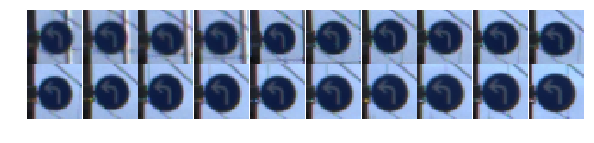

class 35: Ahead only


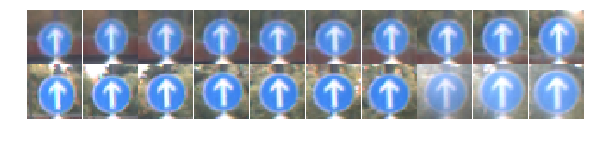

class 36: Go straight or right


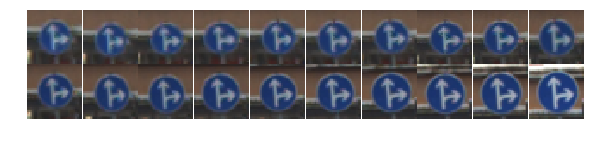

class 37: Go straight or left


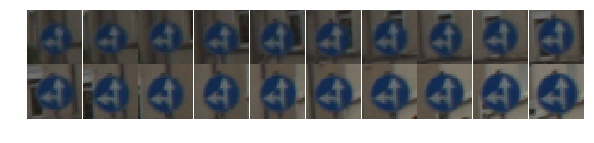

class 38: Keep right


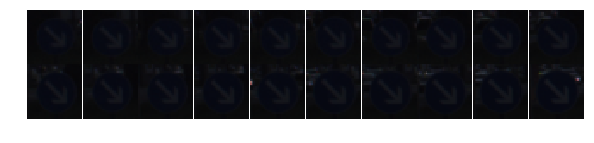

class 39: Keep left


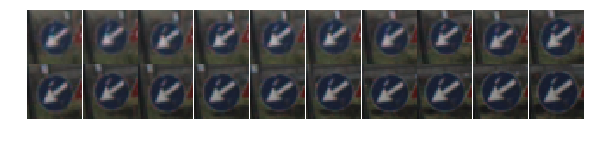

class 40: Roundabout mandatory


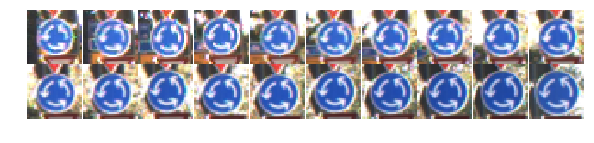

class 41: End of no passing


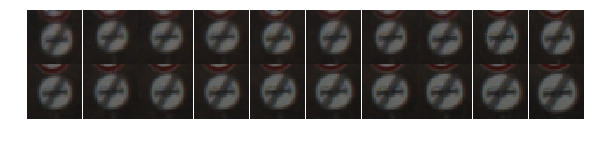

class 42: End of no passing by vehicles over 3.5 metric tons


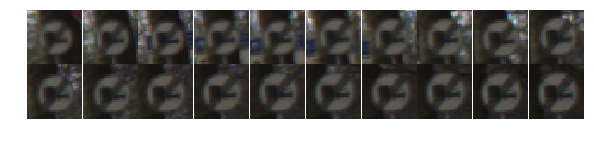

In [26]:
#show the images in all classes
for label_no in range(n_classes):
    visualize_dataset(X_train,y_train,signnames,label_no)    
    

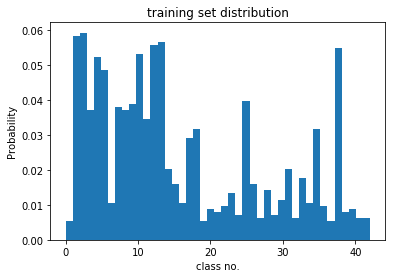

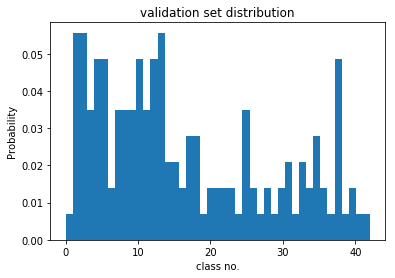

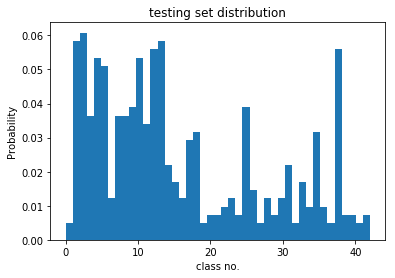

In [5]:
#show the distribution of training set 
fig= plt.plot()
plt.hist(y_train, normed=True, bins=n_classes)
plt.xlabel('class no.')
plt.ylabel('Probability')
plt.title('training set distribution')
plt.show()

#show the distribution of validation set 
fig= plt.plot()
plt.hist(y_valid, normed=True, bins=n_classes)
plt.xlabel('class no.')
plt.ylabel('Probability')
plt.title('validation set distribution')
plt.show()


#show the distribution of testing set 
fig= plt.plot()
plt.hist(y_test, normed=True, bins=n_classes)
plt.xlabel('class no.')
plt.ylabel('Probability')
plt.title('testing set distribution')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import skimage.transform as sk_tf
from skimage.util import random_noise
from skimage.exposure import equalize_hist

class Data_Augment(object):
    def __init__(self):
        pass
    #Rotation angle in degrees in counter-clockwise direction.
    def rotate(self,images, rot_deg):
        augment_images = np.copy(images)*0.0
        for i in range(len(images)):
            augment_images[i,:,:,:] = sk_tf.rotate(images[i,:,:,:],rot_deg)
        return augment_images
    
    #histogram equalization
    def hist_equal(self,images):
        augment_images = np.copy(images)*0.0
        for i in range(len(images)):
            augment_images[i,:,:,:]  = equalize_hist(images[i,:,:,:]) 
        return augment_images
    
    #add gaussian noise
    def noise(self,images):
        augment_images = np.copy(images)*0.0
        for i in range(len(images)):
             augment_images[i,:,:,:] = random_noise(images[i,:,:,:],mode='gaussian')
        return augment_images
    
    #affine images by image scale, translation, rotation
    def affine(self,images,scale=(1.0, 1.0), rotation=0.0,translation=(0, 0)):
        augment_images = np.copy(images)*0.0
        shift_form = sk_tf.AffineTransform(scale=scale, rotation=rotation,translation=translation)
        for i in range(len(images)):
            augment_images[i,:,:,:]=sk_tf.warp(images[i,:,:,:],shift_form)
        return augment_images
            


### Show Augmentation images
augmented images inclued noisy, histogram equalization, transition, zoom up, and rotation images

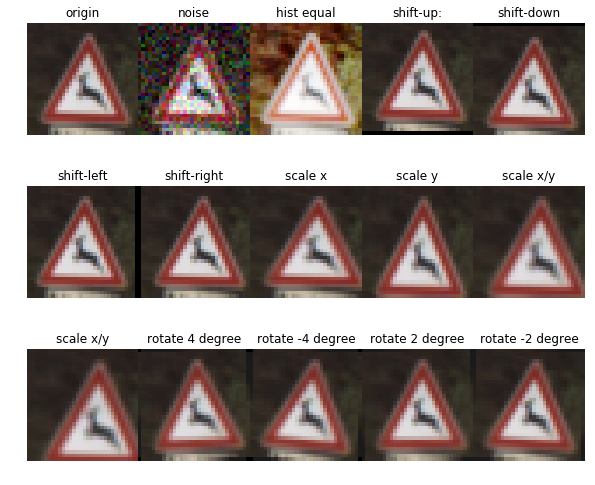

In [7]:
import warnings
warnings.filterwarnings('ignore')
#create augment object
Augment = Data_Augment()
#choose a item to test
test_item = 500
test_image = np.expand_dims(X_train[test_item,:,:,:],axis=0)

#Start to augmentate!

#add noise
noise_image = np.squeeze(Augment.noise(test_image))
#histgorm equalization
hist_equal_image = np.squeeze(Augment.hist_equal(test_image))
#translation shift-up
affine_image1 = np.squeeze(Augment.affine(test_image,scale=(1.0, 1.0),rotation=0.0,translation=(0, 1)))
#translation shoft-down
affine_image2 = np.squeeze(Augment.affine(test_image,scale=(1.0, 1.0),rotation=0.0,translation=(0, -1)))
#translation shift-left
affine_image3 = np.squeeze(Augment.affine(test_image,scale=(1.0, 1.0),rotation=0.0,translation=(1, 0)))
#translation shift-right
affine_image4 = np.squeeze(Augment.affine(test_image,scale=(1.0, 1.0),rotation=0.0,translation=(-1,0)))
#scale x up
affine_image5 = np.squeeze(Augment.affine(test_image,scale=(0.9, 1.0),rotation=0.0,translation=(0, 0)))
#scale y up
affine_image6 = np.squeeze(Augment.affine(test_image,scale=(1.0, 0.9),rotation=0.0,translation=(0, 0)))
#scale x and y up
affine_image7 = np.squeeze(Augment.affine(test_image,scale=(0.9, 0.9),rotation=0.0,translation=(0, 0)))
#scale x and y up
affine_image8 = np.squeeze(Augment.affine(test_image,scale=(0.85, 0.85),rotation=0.0,translation=(0, 0)))
#rotate
rotate_image1 = np.squeeze(Augment.rotate(test_image,4))
rotate_image2 = np.squeeze(Augment.rotate(test_image,-4))
rotate_image3 = np.squeeze(Augment.rotate(test_image,2))
rotate_image4 = np.squeeze(Augment.rotate(test_image,-2))

#plot augmentation images
n_col_plot = 5
n_row_plot = 3
fig = plt.figure(figsize = (2*n_col_plot, 3*n_row_plot))
plot_count = 0
fig.subplots_adjust(hspace = 0, wspace = 0)


ax = fig.add_subplot(n_row_plot, n_col_plot, 1)
ax.axis('off')
plt.title('origin')
plt.imshow(np.squeeze(test_image))

ax = fig.add_subplot(n_row_plot, n_col_plot, 2)
ax.axis('off')
plt.title('noise')
plt.imshow(noise_image)

ax = fig.add_subplot(n_row_plot, n_col_plot, 3)
ax.axis('off')
plt.title('hist equal')
plt.imshow(hist_equal_image)

ax = fig.add_subplot(n_row_plot, n_col_plot, 4)
ax.axis('off')
plt.title('shift-up:')
plt.imshow(affine_image1)

ax = fig.add_subplot(n_row_plot, n_col_plot, 5)
ax.axis('off')
plt.title('shift-down')
plt.imshow(affine_image2)

ax = fig.add_subplot(n_row_plot, n_col_plot, 6)
ax.axis('off')
plt.title('shift-left')
plt.imshow(affine_image3)

ax = fig.add_subplot(n_row_plot, n_col_plot, 7)
ax.axis('off')
plt.title('shift-right')
plt.imshow(affine_image4)

ax = fig.add_subplot(n_row_plot, n_col_plot, 8)
ax.axis('off')
plt.title('scale x')
plt.imshow(affine_image5)

ax = fig.add_subplot(n_row_plot, n_col_plot, 9)
ax.axis('off')
plt.title('scale y')
plt.imshow(affine_image6)

ax = fig.add_subplot(n_row_plot, n_col_plot, 10)
ax.axis('off')
plt.title('scale x/y')
plt.imshow(affine_image7)

ax = fig.add_subplot(n_row_plot, n_col_plot, 11)
ax.axis('off')
plt.title('scale x/y')
plt.imshow(affine_image8)

ax = fig.add_subplot(n_row_plot, n_col_plot, 12)
ax.axis('off')
plt.title('rotate 4 degree')
plt.imshow(rotate_image1)

ax = fig.add_subplot(n_row_plot, n_col_plot, 13)
ax.axis('off')
plt.title('rotate -4 degree')
plt.imshow(rotate_image2)

ax = fig.add_subplot(n_row_plot, n_col_plot, 14)
ax.axis('off')
plt.title('rotate 2 degree')
plt.imshow(rotate_image3)

ax = fig.add_subplot(n_row_plot, n_col_plot, 15)
ax.axis('off')
plt.title('rotate -2 degree')
plt.imshow(rotate_image4)

plt.show()


### Augment train data set

In [8]:
#add noise
noise_train = Augment.noise(X_train)
#histogram equalization
hist_equal_train = Augment.hist_equal(X_train)
#rotate
rotate_train1 = Augment.rotate(X_train,2)
rotate_train2 = Augment.rotate(X_train,-2)
#rotate_train3 = Augment.rotate(X_train,4)
#rotate_train4 = Augment.rotate(X_train,-4)
#affine
affine_train1 = Augment.affine(X_train,scale=(0.9,0.9),rotation=0.0,translation=(0,0))
affine_train2 = Augment.affine(X_train,scale=(0.9,1.0),rotation=0.0,translation=(0,0))
affine_train3 = Augment.affine(X_train,scale=(1.0,0.9),rotation=0.0,translation=(0,0))
#affine_train3 = Augment.affine(X_train,scale=(0.85,0.85),rotation=0.0,translation=(0,0))
#affine_train5 = Augment.affine(X_train,scale=(1.0,1.0),rotation=0.0,translation=(1,0))
#affine_train6 = Augment.affine(X_train,scale=(1.0,1.0),rotation=0.0,translation=(-1,0))
#affine_train7 = Augment.affine(X_train,scale=(1.0,1.0),rotation=0.0,translation=(0,1))
#affine_train8 = Augment.affine(X_train,scale=(1.0,1.0),rotation=0.0,translation=(0,-1))

#class_to_visual = 0
#visualize_dataset(noise_train,y_train,signnames,class_to_visual)


In [9]:
#combine augmentation data into training set
Augment_X_train = np.concatenate((X_train,noise_train,hist_equal_train,rotate_train1,rotate_train2,affine_train1,affine_train2,affine_train3),axis=0)
Augment_y_train = np.concatenate((y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train),axis=0)
print(Augment_X_train.shape)
print(Augment_y_train.shape)

(278392, 32, 32, 3)
(278392,)


In [10]:
def normalize_images(images,mode='zero_mean'):
    norm_images = np.copy(images)*0.0
    if mode=='zero_median':
        for i in range(len(images)):
            norm_images[i,:,:,:] = (images[i,:,:,:]-128.0)/128.0
    elif mode=='zero_mean':
        for i in range(len(images)):
            i_std = np.std(images[i,:,:,:])
            i_mean = np.mean(images[i,:,:,:])
            norm_images[i,:,:,:] = (images[i,:,:,:]-i_mean)/(i_std+0.000001)
    elif mode=='min_max':
        for i in range(len(images)):
            i_min = np.min(images[i,:,:,:])
            i_max = np.max(images[i,:,:,:])
            norm_images[i,:,:,:] = (images[i,:,:,:]-i_min)/(i_max-i_min+0.000001)
    else:
        norm_images = np.copy(images)
    return norm_images


def show_data_analysis(features):
    print('--------------------------------------------------------')
    print('    mean of the dataset = %s' %(np.mean(features)))
    print('    std of the dataset = %s' %(np.std(features)))
    print('    range of the dataset(min,max) = (%s , %s)' %(np.min(features),np.max(features)))
    print('--------------------------------------------------------')


In [11]:
print('train data info before normalization')
show_data_analysis(Augment_X_train)   
norm_X_train = normalize_images(Augment_X_train)
print('train data info after normalization')
show_data_analysis(norm_X_train)
norm_y_train = np.copy(Augment_y_train)

train data info before normalization
--------------------------------------------------------
    mean of the dataset = 10.6427125364
    std of the dataset = 36.288064408
    range of the dataset(min,max) = (0.0 , 255.0)
--------------------------------------------------------
train data info after normalization
--------------------------------------------------------
    mean of the dataset = -1.79459309564e-21
    std of the dataset = 0.999992203003
    range of the dataset(min,max) = (-8.96119311832 , 22.6019255282)
--------------------------------------------------------


In [12]:
#clear memory
del Augment_X_train
del Augment_y_train
del noise_train
del hist_equal_train
del rotate_train1
del rotate_train2
del affine_train1
del affine_train2
del affine_train3


### Model Architecture

define the basic convolution network layer

In [13]:
import tensorflow as tf
#define the basic convolution and fc layer in cnn
def cnn_conv_layer(name,input,filters,kernel_size=[5,5],w_mu=0.0,w_sigma=0.1,padding='VALID',activation=None):
    with tf.name_scope(name):
        conv_W = tf.Variable(tf.truncated_normal(shape=(kernel_size[0], kernel_size[1], input.get_shape().as_list()[3], filters), mean = w_mu, stddev = w_sigma),name='conv_weight')
        conv_b = tf.Variable(tf.zeros([filters]),name='conv_bias')
        conv = tf.nn.conv2d(input, conv_W, strides=[1, 1, 1, 1], padding=padding) + conv_b
        if activation is not None:
             conv = activation(conv)
        return conv

def cnn_fc_layer(name,input,filters,w_mu=0.0,w_sigma=0.1,activation=None):
    fc_W = tf.Variable(tf.truncated_normal(shape=(input.get_shape().as_list()[1] , filters), mean = w_mu, stddev = w_sigma),name='fc_weight')
    fc_b = tf.Variable(tf.zeros([filters]),name='fc_bias')
    fc = tf.nn.xw_plus_b(input, fc_W, fc_b)
    if activation is not None:
        fc = activation(fc)
    return fc

def max_pool(x,filter_size,stride_size, padding='VALID'):
    x = tf.nn.max_pool(x, ksize=[1, filter_size, filter_size, 1], strides=[1, stride_size, stride_size, 1], padding=padding)
    return x



### Model for traffic classifier
The model name is from my cat shoo-shoo ^^

In [14]:
from tensorflow.contrib.layers import flatten

def ShooNet(x,keep_prob,no_classes):
    #Hyperparameters
    mu = 0.0
    sigma = 0.1
    with tf.name_scope('ShooNet'):
        # Convolutional Layer Input = 32x32x3. Output = 28x28x48.
        conv1_act = cnn_conv_layer('conv1',x,48,kernel_size=[5,5],w_mu=mu,w_sigma=sigma,padding='VALID',activation=tf.nn.relu)
        # Max Pooling. Input = 28x28x48. Output = 14x14x48
        conv1_pl = max_pool(conv1_act,2,2,padding='VALID')
        # Dropout
        conv1_dp = tf.nn.dropout(conv1_pl,keep_prob)


       # Convolutional Layer. Output = 10x10x96.
        conv2_act = cnn_conv_layer('conv2',conv1_dp,96,kernel_size=[5,5],w_mu=mu,w_sigma=sigma,padding='VALID',activation=tf.nn.relu)
        # Max Pooling. Input = 10x10x96. Output = 5x5x96
        conv2_pl = max_pool(conv2_act,2,2,padding='VALID')
        # Dropout
        conv2_dp = tf.nn.dropout(conv2_pl,keep_prob)

        # Convolutional Layer. Input = 5x5x96. Output = 3x3x172
        conv3_act = cnn_conv_layer('conv3', conv2_dp,172,kernel_size=[3,3],w_mu=mu,w_sigma=sigma,padding='VALID',activation=tf.nn.relu)
        # Max Pooling. Input = 3x3x172. Output = 2x2x172.
        conv3_pl = max_pool(conv3_act,2,1,padding='VALID')
        # Dropout
        conv3_dp = tf.nn.dropout(conv3_pl,keep_prob)

        # Flatten. Input = 2x2x172. Output = 688.
        fc1 = flatten(conv3_dp)

        # Fully Connected. Input = 688. Output = 344.
        fc2 = cnn_fc_layer('fc2',fc1,344,w_mu=0.0,w_sigma=0.1,activation=tf.nn.relu)
        fc2_dp = tf.nn.dropout(fc2,keep_prob)

        # Fully Connected. Input = 344. Output = 172.
        fc3 = cnn_fc_layer('fc3',fc2_dp,172,w_mu=0.0,w_sigma=0.1,activation=tf.nn.relu)
        fc3_dp = tf.nn.dropout(fc3,keep_prob)

        # Fully Connected. Input = 172. Output = 86.
        fc4 = cnn_fc_layer('fc4',fc3_dp,86,w_mu=0.0,w_sigma=0.1,activation=tf.nn.relu)
        fc4_dp = tf.nn.dropout(fc4,keep_prob)
        # Fully Connected. Input = 86. Output = 43.
        logits = cnn_fc_layer('logits',fc4_dp,no_classes,w_mu=0.0,w_sigma=0.1,activation=None)

        return logits,conv1_act,conv2_act,conv3_act
    

### Loss, accuracy and training operation

In [15]:
#placehoder for train set
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#dropout (keep probability)
keep_prob = tf.placeholder(tf.float32)
#encode labels into one-hot
y_one_hot = tf.one_hot(y, n_classes)

#prediction value from the model
logits,conv1,conv2,conv3= ShooNet(x,keep_prob,n_classes)

#define the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels= y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)

#define the training operation
training_operation = optimizer.minimize(loss_operation)

#accuracy measurement
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
def evaluate_acc(X_data, y_data):
    BATCH_SIZE = 128
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def evaluate_loss(X_data, y_data):
    BATCH_SIZE = 128
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    total_num_of_batch = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_num_of_batch+=1
        total_loss +=loss
        #total_loss += (loss * len(batch_x))
        
    return total_loss / total_num_of_batch


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
def plot_hist_loss(train_loss_list,valid_loss_list,iter_list):
    fig = plt.plot()
    plt.plot(iter_list,np.log(train_loss_list),label='train_loss')
    plt.plot(iter_list,np.log(valid_loss_list),label='valid_loss')
    plt.legend(loc='upper right')
    plt.title('loss')
    plt.xlabel('iter')
    plt.ylabel('log(loss)')
    plt.show()
def plot_hist_acc(train_acc_list,valid_acc_list,iter_list):
    fig = plt.plot()
    plt.plot(iter_list,train_acc_list,label='train_acc')
    plt.plot(iter_list,valid_acc_list,label='valid_acc')
    plt.legend(loc='lower right')
    plt.title('accuracy')
    plt.xlabel('iter')
    plt.ylabel('accuracy')
    plt.show()

Training...
EPOCH 1 ... 
Validation acc = 0.059  Training acc   = 0.162
Validation acc = 0.256  Training acc   = 0.365
EPOCH 2 ... 
Validation acc = 0.418  Training acc   = 0.539
Validation acc = 0.575  Training acc   = 0.641
Validation acc = 0.676  Training acc   = 0.753
EPOCH 3 ... 
Validation acc = 0.777  Training acc   = 0.800
Validation acc = 0.806  Training acc   = 0.846
Validation acc = 0.877  Training acc   = 0.898
EPOCH 4 ... 
Validation acc = 0.909  Training acc   = 0.916
Validation acc = 0.913  Training acc   = 0.934


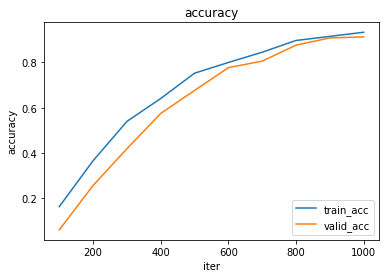

EPOCH 5 ... 
Validation acc = 0.917  Training acc   = 0.944
Validation acc = 0.924  Training acc   = 0.946
Validation acc = 0.909  Training acc   = 0.952
EPOCH 6 ... 
Validation acc = 0.932  Training acc   = 0.954
Validation acc = 0.931  Training acc   = 0.959
Validation acc = 0.947  Training acc   = 0.966
EPOCH 7 ... 
Validation acc = 0.946  Training acc   = 0.967
Validation acc = 0.953  Training acc   = 0.968
Validation acc = 0.943  Training acc   = 0.971
EPOCH 8 ... 
Validation acc = 0.956  Training acc   = 0.970


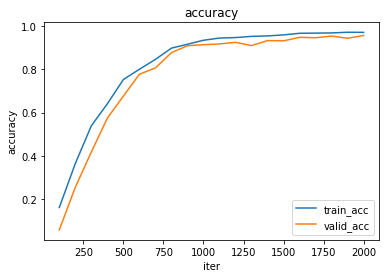

Validation acc = 0.957  Training acc   = 0.968
EPOCH 9 ... 
Validation acc = 0.960  Training acc   = 0.973
Validation acc = 0.951  Training acc   = 0.977
Validation acc = 0.956  Training acc   = 0.978
EPOCH 10 ... 
Validation acc = 0.962  Training acc   = 0.974
Validation acc = 0.957  Training acc   = 0.977
Validation acc = 0.955  Training acc   = 0.977
EPOCH 11 ... 
Validation acc = 0.966  Training acc   = 0.978
Validation acc = 0.955  Training acc   = 0.977
EPOCH 12 ... 
Validation acc = 0.959  Training acc   = 0.980


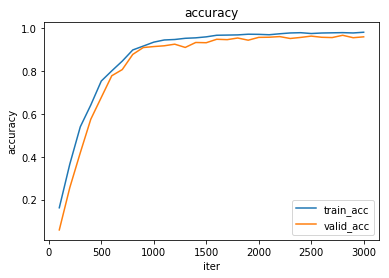

Validation acc = 0.973  Training acc   = 0.983
Validation acc = 0.974  Training acc   = 0.982
EPOCH 13 ... 
Validation acc = 0.972  Training acc   = 0.982
Validation acc = 0.963  Training acc   = 0.982
Validation acc = 0.957  Training acc   = 0.982
EPOCH 14 ... 
Validation acc = 0.958  Training acc   = 0.982
Validation acc = 0.966  Training acc   = 0.983
Validation acc = 0.965  Training acc   = 0.983
EPOCH 15 ... 
Validation acc = 0.974  Training acc   = 0.983
Validation acc = 0.965  Training acc   = 0.984


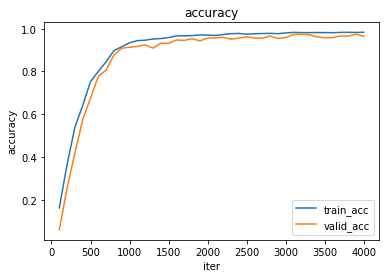

EPOCH 16 ... 
Validation acc = 0.965  Training acc   = 0.985
Validation acc = 0.972  Training acc   = 0.984
Validation acc = 0.952  Training acc   = 0.982
EPOCH 17 ... 
Validation acc = 0.977  Training acc   = 0.985
Validation acc = 0.959  Training acc   = 0.983
Validation acc = 0.968  Training acc   = 0.984
EPOCH 18 ... 
Validation acc = 0.971  Training acc   = 0.984
Validation acc = 0.975  Training acc   = 0.986
EPOCH 19 ... 
Validation acc = 0.969  Training acc   = 0.985
Validation acc = 0.968  Training acc   = 0.985


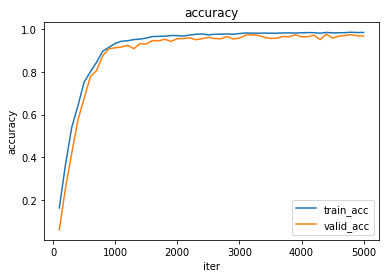

Validation acc = 0.973  Training acc   = 0.987
EPOCH 20 ... 
Validation acc = 0.969  Training acc   = 0.985
Validation acc = 0.979  Training acc   = 0.985
Validation acc = 0.975  Training acc   = 0.987
EPOCH 21 ... 
Validation acc = 0.978  Training acc   = 0.987
Validation acc = 0.979  Training acc   = 0.987
Validation acc = 0.974  Training acc   = 0.987
EPOCH 22 ... 
Validation acc = 0.977  Training acc   = 0.987
Validation acc = 0.973  Training acc   = 0.986
EPOCH 23 ... 
Validation acc = 0.974  Training acc   = 0.987


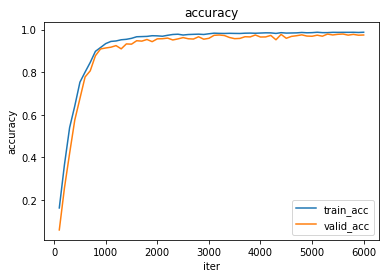

Validation acc = 0.978  Training acc   = 0.987
Validation acc = 0.972  Training acc   = 0.985
EPOCH 24 ... 
Validation acc = 0.970  Training acc   = 0.987
Validation acc = 0.977  Training acc   = 0.987
Validation acc = 0.959  Training acc   = 0.988
EPOCH 25 ... 
Validation acc = 0.975  Training acc   = 0.986
Validation acc = 0.970  Training acc   = 0.988
Validation acc = 0.965  Training acc   = 0.983
EPOCH 26 ... 
Validation acc = 0.966  Training acc   = 0.988
Validation acc = 0.973  Training acc   = 0.988


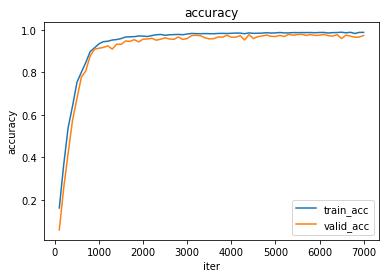

EPOCH 27 ... 
Validation acc = 0.968  Training acc   = 0.989
Validation acc = 0.970  Training acc   = 0.988
Validation acc = 0.976  Training acc   = 0.989
EPOCH 28 ... 
Validation acc = 0.968  Training acc   = 0.989
Validation acc = 0.978  Training acc   = 0.989
Validation acc = 0.968  Training acc   = 0.988
EPOCH 29 ... 
Validation acc = 0.967  Training acc   = 0.988
Validation acc = 0.967  Training acc   = 0.987
EPOCH 30 ... 
Validation acc = 0.979  Training acc   = 0.989
Validation acc = 0.976  Training acc   = 0.988


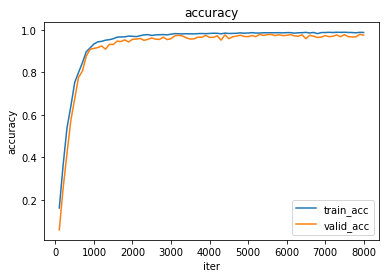

Validation acc = 0.971  Training acc   = 0.988
EPOCH 31 ... 
Validation acc = 0.972  Training acc   = 0.989
Validation acc = 0.960  Training acc   = 0.988
Validation acc = 0.976  Training acc   = 0.990
EPOCH 32 ... 
Validation acc = 0.969  Training acc   = 0.986
Validation acc = 0.970  Training acc   = 0.989
Validation acc = 0.971  Training acc   = 0.988
EPOCH 33 ... 
Validation acc = 0.968  Training acc   = 0.989
Validation acc = 0.962  Training acc   = 0.988
EPOCH 34 ... 
Validation acc = 0.972  Training acc   = 0.988


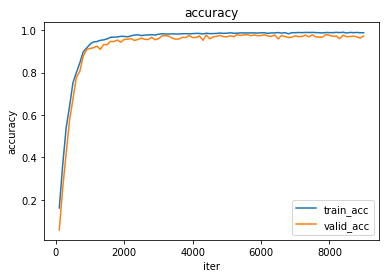

Validation acc = 0.951  Training acc   = 0.988
Validation acc = 0.969  Training acc   = 0.989
EPOCH 35 ... 
Validation acc = 0.971  Training acc   = 0.990
Validation acc = 0.964  Training acc   = 0.990
Validation acc = 0.970  Training acc   = 0.988
EPOCH 36 ... 
Validation acc = 0.960  Training acc   = 0.989
Validation acc = 0.964  Training acc   = 0.989
EPOCH 37 ... 
Validation acc = 0.972  Training acc   = 0.990
Validation acc = 0.968  Training acc   = 0.989
Validation acc = 0.971  Training acc   = 0.990


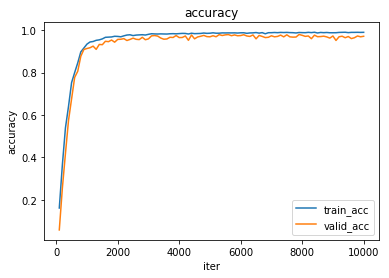

EPOCH 38 ... 
Validation acc = 0.973  Training acc   = 0.988
Validation acc = 0.973  Training acc   = 0.990
Validation acc = 0.971  Training acc   = 0.989
EPOCH 39 ... 
Validation acc = 0.968  Training acc   = 0.987
Validation acc = 0.975  Training acc   = 0.990
Validation acc = 0.974  Training acc   = 0.988
EPOCH 40 ... 
Validation acc = 0.968  Training acc   = 0.990
Validation acc = 0.970  Training acc   = 0.990
EPOCH 41 ... 
Validation acc = 0.967  Training acc   = 0.989
Validation acc = 0.968  Training acc   = 0.989


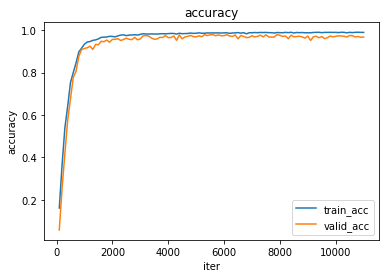

Validation acc = 0.964  Training acc   = 0.989
EPOCH 42 ... 
Validation acc = 0.966  Training acc   = 0.990
Validation acc = 0.975  Training acc   = 0.991
Validation acc = 0.975  Training acc   = 0.991
EPOCH 43 ... 
Validation acc = 0.976  Training acc   = 0.992
Validation acc = 0.974  Training acc   = 0.989
EPOCH 44 ... 
Validation acc = 0.966  Training acc   = 0.990
Validation acc = 0.973  Training acc   = 0.991
Validation acc = 0.974  Training acc   = 0.990
EPOCH 45 ... 
Validation acc = 0.965  Training acc   = 0.987


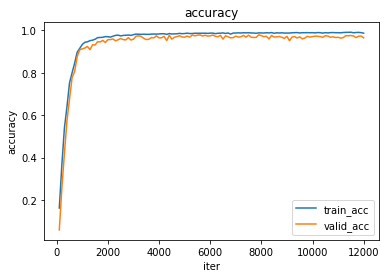

Validation acc = 0.977  Training acc   = 0.990
Validation acc = 0.961  Training acc   = 0.990
EPOCH 46 ... 
Validation acc = 0.953  Training acc   = 0.987
Validation acc = 0.976  Training acc   = 0.990
Validation acc = 0.967  Training acc   = 0.989
EPOCH 47 ... 
Validation acc = 0.967  Training acc   = 0.991
Validation acc = 0.968  Training acc   = 0.991
EPOCH 48 ... 
Validation acc = 0.968  Training acc   = 0.990
Validation acc = 0.979  Training acc   = 0.990
Validation acc = 0.968  Training acc   = 0.991


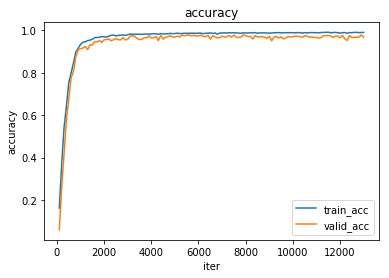

EPOCH 49 ... 
Validation acc = 0.963  Training acc   = 0.991
Validation acc = 0.973  Training acc   = 0.991
Validation acc = 0.974  Training acc   = 0.991
EPOCH 50 ... 
Validation acc = 0.962  Training acc   = 0.991
Validation acc = 0.980  Training acc   = 0.991
Validation acc = 0.970  Training acc   = 0.991
EPOCH 51 ... 
Validation acc = 0.965  Training acc   = 0.992
Validation acc = 0.968  Training acc   = 0.992
EPOCH 52 ... 
Validation acc = 0.965  Training acc   = 0.992
Validation acc = 0.968  Training acc   = 0.991


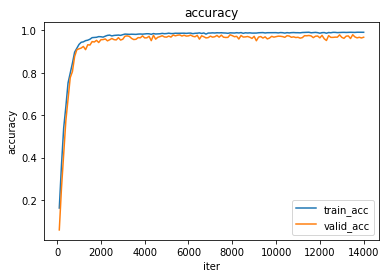

Validation acc = 0.962  Training acc   = 0.991
EPOCH 53 ... 
Validation acc = 0.956  Training acc   = 0.989
Validation acc = 0.971  Training acc   = 0.991
Validation acc = 0.952  Training acc   = 0.991
EPOCH 54 ... 
Validation acc = 0.968  Training acc   = 0.991
Validation acc = 0.961  Training acc   = 0.991
EPOCH 55 ... 
Validation acc = 0.969  Training acc   = 0.992
Validation acc = 0.974  Training acc   = 0.992
Validation acc = 0.969  Training acc   = 0.992
EPOCH 56 ... 
Validation acc = 0.971  Training acc   = 0.992


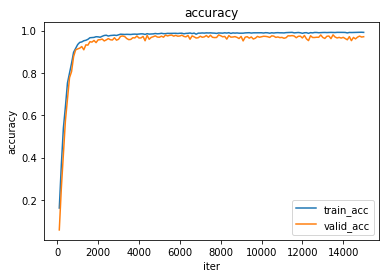

Validation acc = 0.974  Training acc   = 0.989
Validation acc = 0.971  Training acc   = 0.992
EPOCH 57 ... 
Validation acc = 0.981  Training acc   = 0.992
Validation acc = 0.969  Training acc   = 0.991
Validation acc = 0.972  Training acc   = 0.992
EPOCH 58 ... 
Validation acc = 0.972  Training acc   = 0.991
Validation acc = 0.974  Training acc   = 0.992
EPOCH 59 ... 
Validation acc = 0.961  Training acc   = 0.990
Validation acc = 0.970  Training acc   = 0.992
Validation acc = 0.961  Training acc   = 0.991


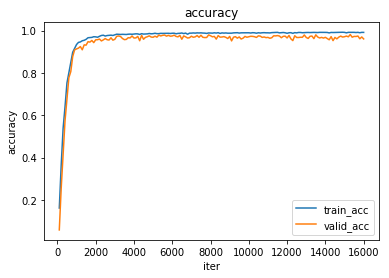

EPOCH 60 ... 
Validation acc = 0.970  Training acc   = 0.991
Validation acc = 0.970  Training acc   = 0.992
Validation acc = 0.968  Training acc   = 0.992
EPOCH 61 ... 
Validation acc = 0.967  Training acc   = 0.991
Validation acc = 0.958  Training acc   = 0.990
EPOCH 62 ... 
Validation acc = 0.962  Training acc   = 0.990
Validation acc = 0.954  Training acc   = 0.990
Validation acc = 0.965  Training acc   = 0.992
EPOCH 63 ... 
Validation acc = 0.971  Training acc   = 0.991
Validation acc = 0.972  Training acc   = 0.991


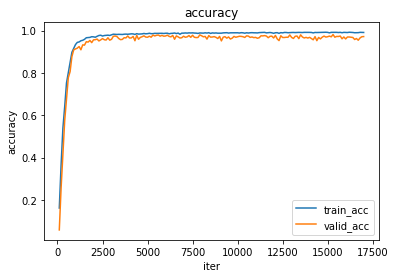

Validation acc = 0.969  Training acc   = 0.992
EPOCH 64 ... 
Validation acc = 0.940  Training acc   = 0.989
Validation acc = 0.952  Training acc   = 0.991
Validation acc = 0.973  Training acc   = 0.992
EPOCH 65 ... 
Validation acc = 0.962  Training acc   = 0.992
Validation acc = 0.968  Training acc   = 0.991
EPOCH 66 ... 
Validation acc = 0.948  Training acc   = 0.982
Validation acc = 0.958  Training acc   = 0.992
Validation acc = 0.959  Training acc   = 0.992
EPOCH 67 ... 
Validation acc = 0.967  Training acc   = 0.991


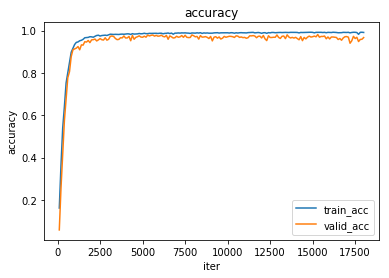

Validation acc = 0.967  Training acc   = 0.992
Validation acc = 0.964  Training acc   = 0.991
EPOCH 68 ... 
Validation acc = 0.951  Training acc   = 0.989
Validation acc = 0.966  Training acc   = 0.991
EPOCH 69 ... 
Validation acc = 0.968  Training acc   = 0.991
Validation acc = 0.962  Training acc   = 0.992
Validation acc = 0.955  Training acc   = 0.991
EPOCH 70 ... 
Validation acc = 0.963  Training acc   = 0.992
Validation acc = 0.972  Training acc   = 0.992
Validation acc = 0.968  Training acc   = 0.992


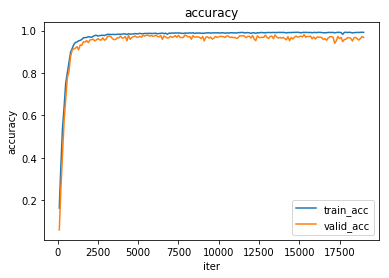

EPOCH 71 ... 
Validation acc = 0.974  Training acc   = 0.992
Validation acc = 0.976  Training acc   = 0.991
Validation acc = 0.965  Training acc   = 0.991
EPOCH 72 ... 
Validation acc = 0.960  Training acc   = 0.992
Validation acc = 0.959  Training acc   = 0.992
EPOCH 73 ... 
Validation acc = 0.964  Training acc   = 0.992
Validation acc = 0.964  Training acc   = 0.992
Validation acc = 0.966  Training acc   = 0.992
EPOCH 74 ... 
Validation acc = 0.963  Training acc   = 0.992
Validation acc = 0.965  Training acc   = 0.992


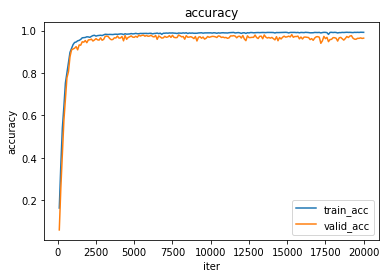

Validation acc = 0.971  Training acc   = 0.991
EPOCH 75 ... 
Validation acc = 0.970  Training acc   = 0.990
Validation acc = 0.972  Training acc   = 0.992
Validation acc = 0.965  Training acc   = 0.991
EPOCH 76 ... 
Validation acc = 0.959  Training acc   = 0.991
Validation acc = 0.970  Training acc   = 0.991
EPOCH 77 ... 
Validation acc = 0.974  Training acc   = 0.992
Validation acc = 0.961  Training acc   = 0.991
Validation acc = 0.975  Training acc   = 0.991
EPOCH 78 ... 
Validation acc = 0.969  Training acc   = 0.992


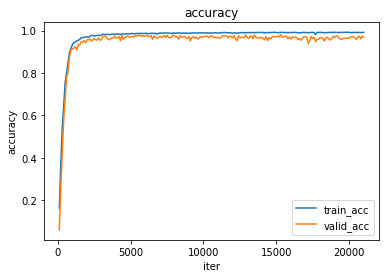

Validation acc = 0.974  Training acc   = 0.992
Validation acc = 0.959  Training acc   = 0.992
EPOCH 79 ... 
Validation acc = 0.972  Training acc   = 0.992
Validation acc = 0.956  Training acc   = 0.991
EPOCH 80 ... 
Validation acc = 0.963  Training acc   = 0.992
Validation acc = 0.965  Training acc   = 0.992
Validation acc = 0.962  Training acc   = 0.992
Model saved


In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
#training parameters
EPOCHS =80
BATCH_SIZE = 128
verfiy_step = 100
disp_step = 1000
save_model_step = 500
drop_out = 0.8

#model directory 
model_dir = 'model/'
model_path  = model_dir + 'shoo.ckpt'
iter_list = []
train_acc_list = []
valid_acc_list = []

saver = tf.train.Saver()

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('/tmp/tensorflowlogs',sess.graph)
    sess.run(tf.global_variables_initializer())
    #restore model  from last step
    ckpt = tf.train.get_checkpoint_state(model_dir)
    if ckpt and ckpt.model_checkpoint_path:
        print('restore model %s' %ckpt.model_checkpoint_path)
        saver.restore(sess, ckpt.model_checkpoint_path)
        
    num_examples = len(X_train)
    step = 1
    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1))
        norm_X_train, norm_y_train = shuffle(norm_X_train, norm_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = norm_X_train[offset:end], norm_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:drop_out})
            
            if step % verfiy_step ==0:
                #evaluate accuracy
                valid_acc = evaluate_acc(X_valid, y_valid)
                train_acc = evaluate_acc(norm_X_train,norm_y_train)
                #add accuracy info intothe array
                train_acc_list.append(train_acc)
                valid_acc_list.append(valid_acc)
                iter_list.append(step)
                
                #display accuracy
    
                print("Validation acc = {:.3f}".format(valid_acc), end="  ")
                print("Training acc   = {:.3f}".format(train_acc))
            if step % disp_step == 0:    
                #plot the history accuracy
                plot_hist_acc(train_acc_list,valid_acc_list,iter_list)
            if step % save_model_step == 0:
                saver.save(sess, model_path, global_step=step)
            step +=1
    saver.save(sess, model_path)
    print("Model saved")




###  Accuracy in test set 

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
model_path = 'model/shoo.ckpt'
#normalize testing set
norm_X_test = normalize_images(X_test)
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,model_path)
    test_acc = evaluate_acc(norm_X_test,y_test)
    print('Test set accuracy = {:.3f}'.format(test_acc))


INFO:tensorflow:Restoring parameters from model/shoo.ckpt
Test set accuracy = 0.971


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

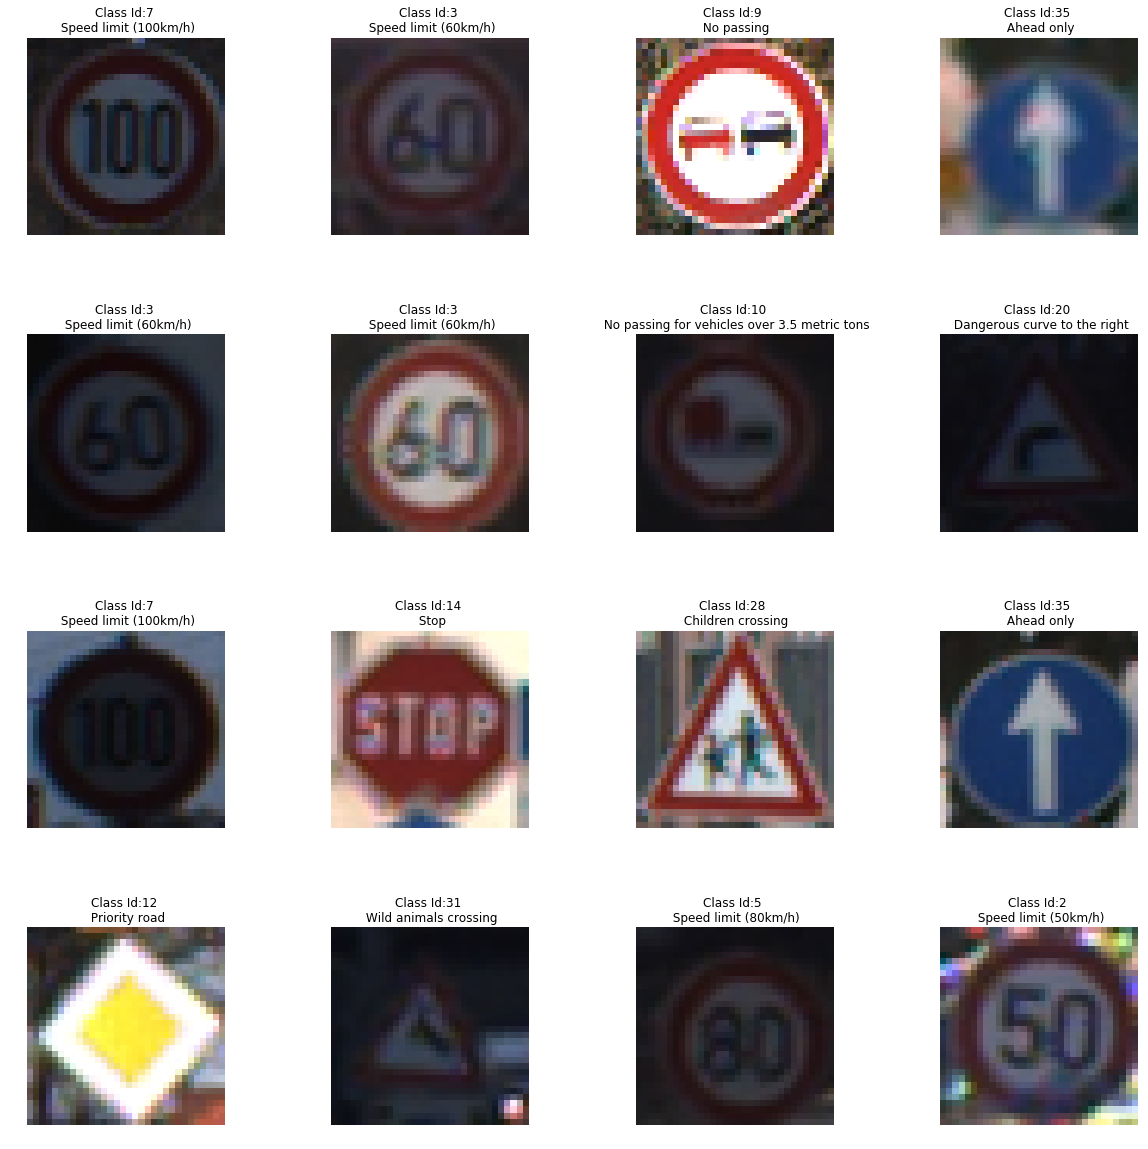

In [28]:
import glob
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.misc import imresize
import pandas as pd
import cv2
import numpy as np

signnames = pd.read_csv('signnames.csv', index_col='SignName')
image_filename_list = glob.glob('GTSRB/Images/*.ppm')
pd = pd.read_csv('GTSRB/GTSRB_Online-Test-GT/GT-online_test.csv',sep=';')

[w, h, x1, x2, y1, y2, id] = pd['Width'], pd['Height'], pd['Roi.X1'], pd['Roi.X2'], pd['Roi.Y1'], pd['Roi.Y2'],pd['ClassId']
GTSRB_X = []
GTSRB_y = []

num_of_test = 16
for i in range(num_of_test):
    img = imread(image_filename_list[i])
    img_crop = img[y1[i]:y2[i]+1,x1[i]:x2[i]+1,:]
    img_crop_resized=  cv2.resize(img_crop, (32,32),interpolation=cv2.INTER_CUBIC)
    GTSRB_X.append(img_crop_resized)
    GTSRB_y.append(id[i])
    
GTSRB_X = np.array(GTSRB_X)  
GTSRB_y = np.array(GTSRB_y)  

#visualize test image
n_row_plot = 4
n_col_plot = int(num_of_test/n_row_plot)
fig = plt.figure(figsize = (5*n_col_plot, 5*n_row_plot))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
plot_count = 1
for i in range(num_of_test):
    ax = fig.add_subplot(n_row_plot, n_col_plot, plot_count)
    ax.axis('off')
    label_id = int(GTSRB_y[i])
    item_name = signnames.index[label_id]
    plt.title('Class Id:%s \n %s' %(label_id,item_name))
              
    plt.imshow(GTSRB_X[i])
    plot_count+=1

#normalize test image 
norm_GTSRB_X = normalize_images(GTSRB_X)


### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def inference_Traffic_Classifier(X_data, sess): 
    traffic_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1.0})    
    return traffic_sign
def inference_Traffic_Classifier_Top5(X_data,sess):
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: X_data, keep_prob: 1.0})
    return top5
def inference_Traffic_Classifier_prob(X_data,sess):
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})
    return prob


### Predict traffic sign in German Traffic Sign Dataset

INFO:tensorflow:Restoring parameters from model/shoo.ckpt


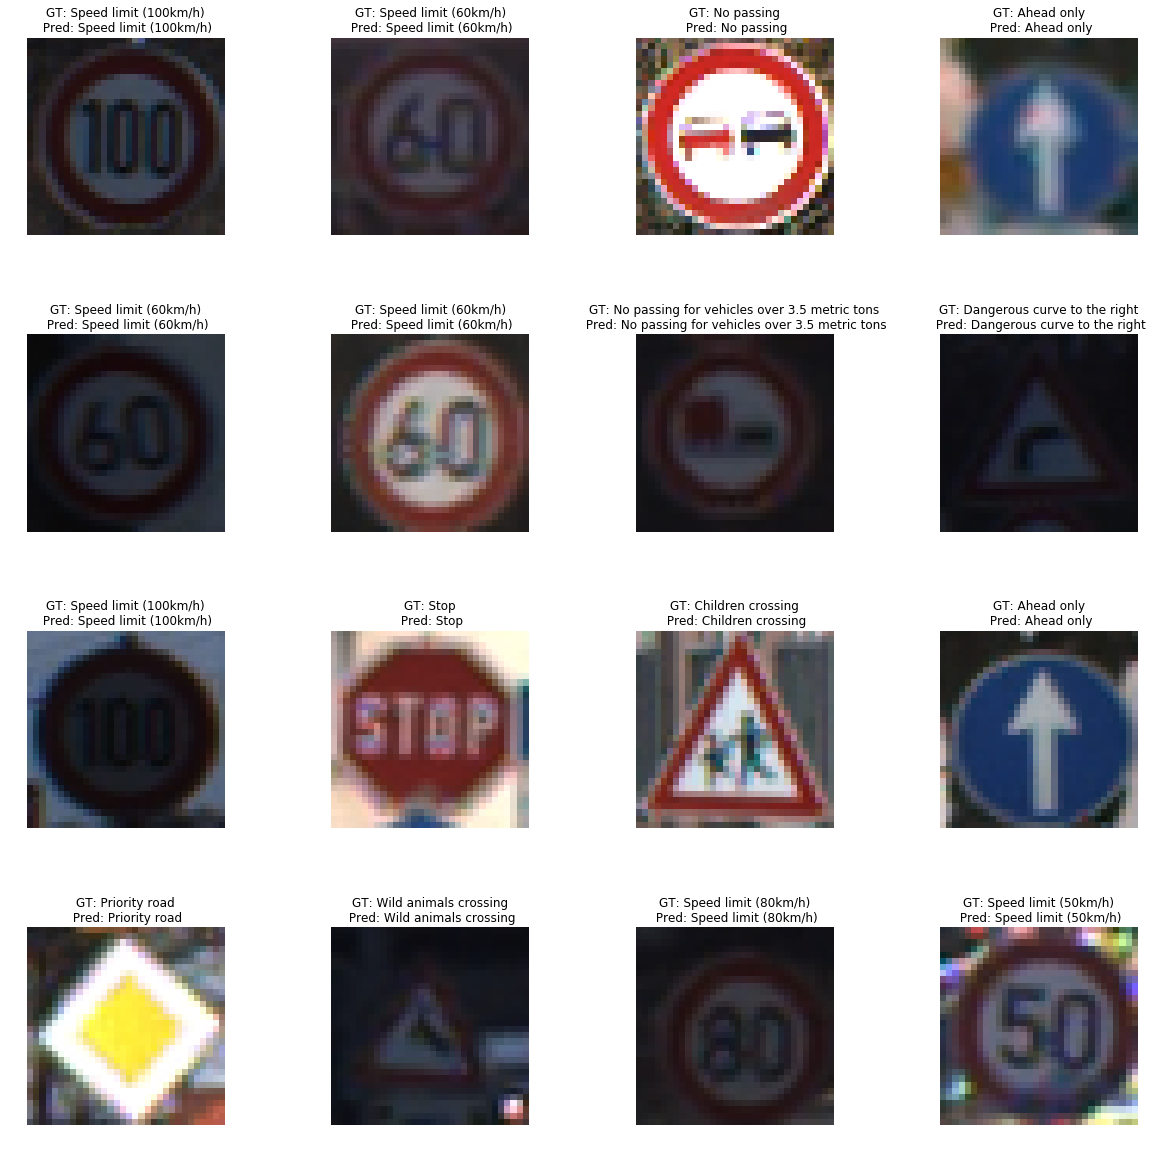

In [30]:
#normalize testing set
norm_GTSRB_X = normalize_images(GTSRB_X)

model_path = 'model/shoo.ckpt'
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,model_path)
    pred_sign = inference_Traffic_Classifier(norm_GTSRB_X, sess)
    
#visualize prediction answer
n_row_plot = 4
n_col_plot = int(num_of_test/n_row_plot)
fig = plt.figure(figsize = (5*n_col_plot, 5*n_row_plot))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
plot_count = 1
for i in range(num_of_test):
    ax = fig.add_subplot(n_row_plot, n_col_plot, plot_count)
    ax.axis('off')
    item_name = signnames.index[label_id]
    plt.title('GT: %s\n Pred: %s' %(signnames.index[GTSRB_y[i]],signnames.index[pred_sign[i]]))
              
    plt.imshow(GTSRB_X[i])
    plot_count+=1


### Analyze Performance

In [77]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

GT_sign = GTSRB_y[0:num_of_test]
print('class id of ground truth: %s' %GT_sign)
print('class id of predictor:    %s' %pred_sign)
diff_sign = GT_sign - pred_sign
num_of_hit_item = np.array((np.where(diff_sign==0))).shape[1]
accuracy = num_of_hit_item / num_of_test *100
print('Accuracy of test images is %s %%' %accuracy)



class id of ground truth: [ 7  3  9 35  3  3 10 20  7 14 28 35 12 31  5  2]
class id of predictor:    [ 7  3  9 35  3  3 10 20  7 14 28 35 12 31  5  2]
Accuracy of test images is 100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from model/shoo.ckpt


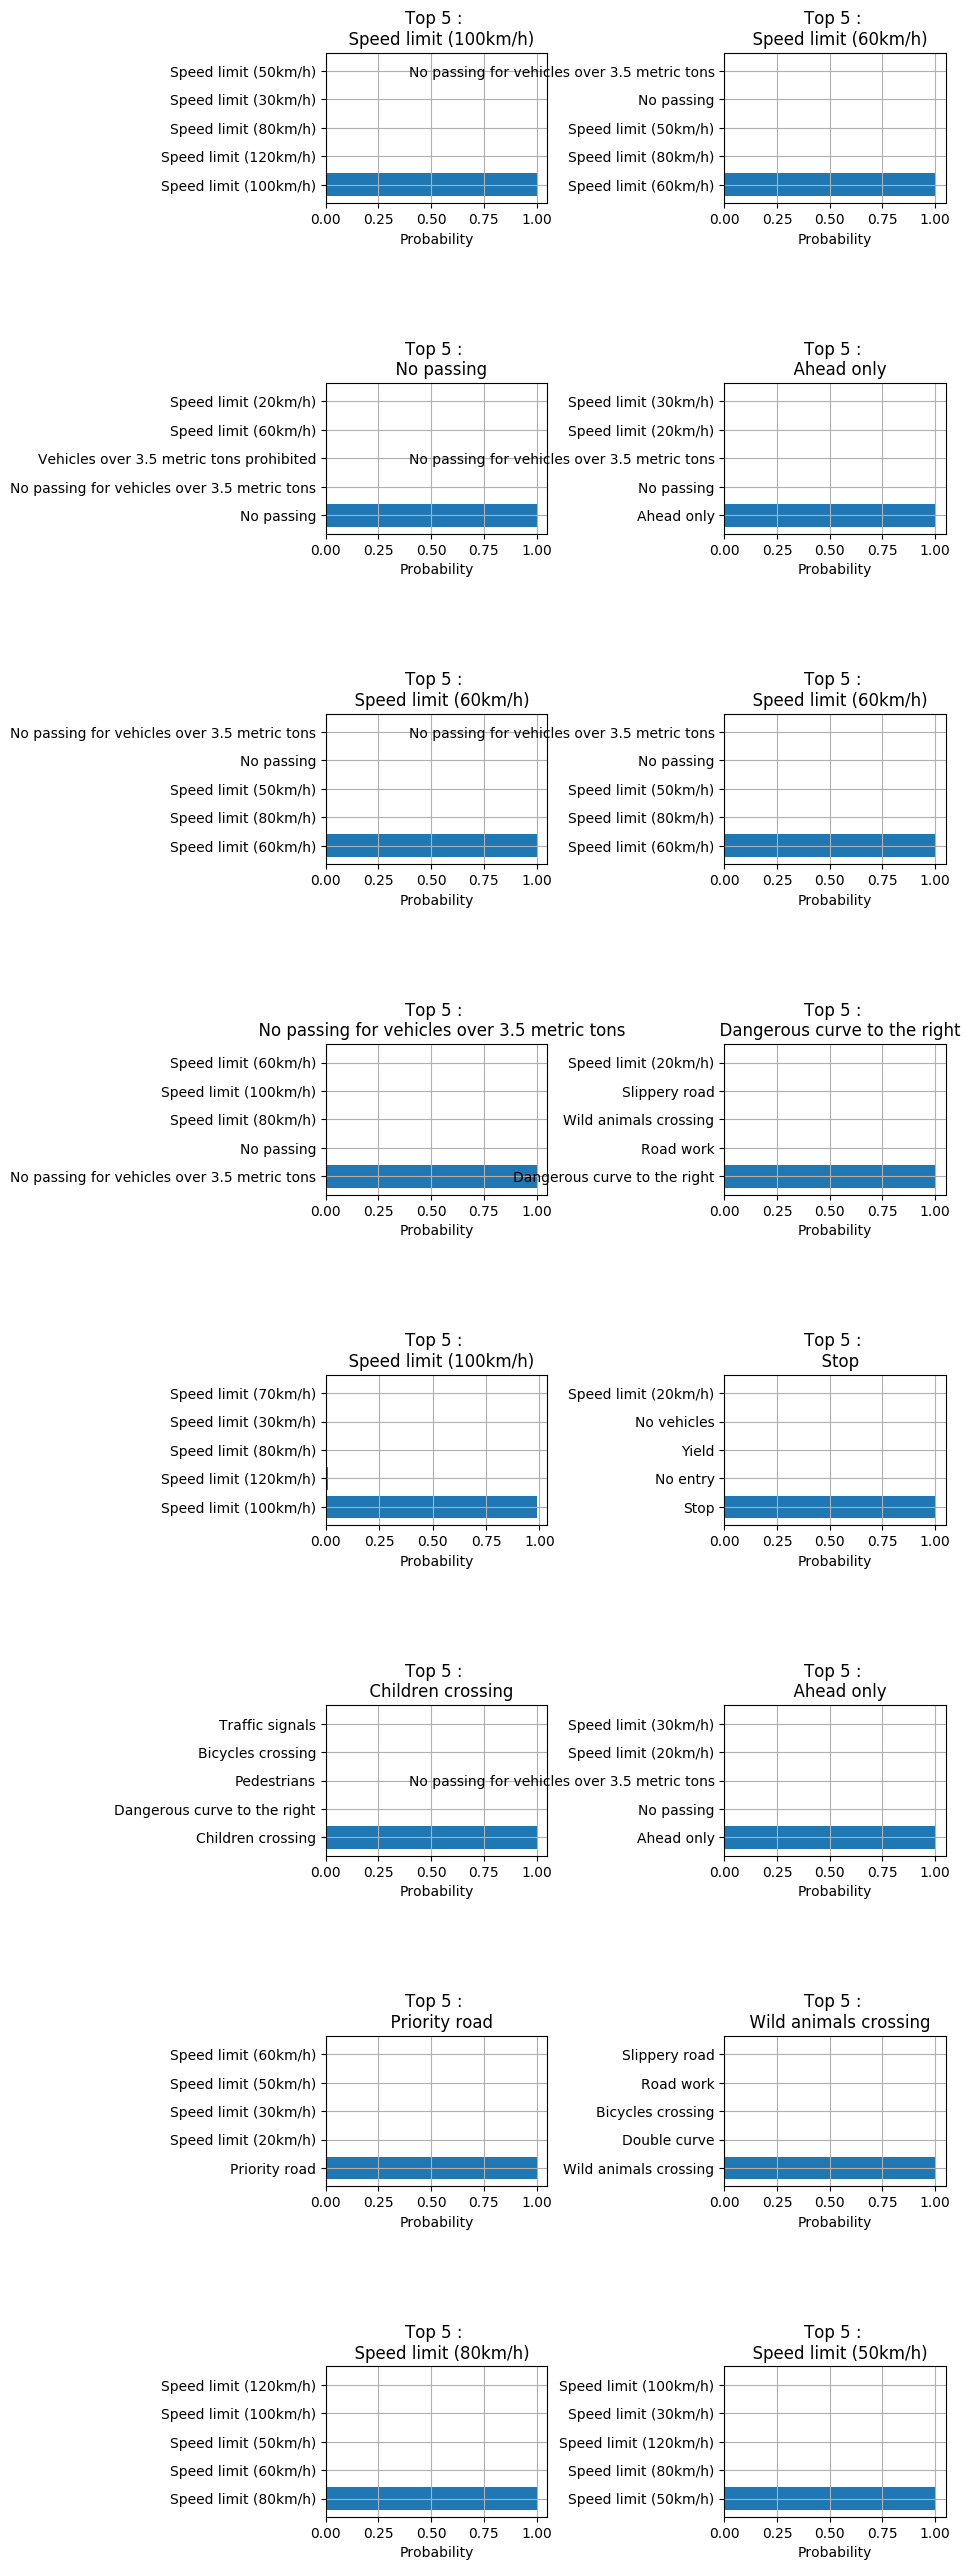

In [116]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
from pylab import *
#get the top5 prediction 
model_path = 'model/shoo.ckpt'
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,model_path)
    pred_Top5 = inference_Traffic_Classifier_Top5(norm_GTSRB_X,sess)

#plot top 5 prediction results
n_row_plot =8
n_col_plot = int(num_of_test/n_row_plot)
fig = plt.figure(figsize = (4*n_col_plot, 4*n_row_plot))
fig.subplots_adjust(hspace = 1.2, wspace = 0.8)
plot_count = 1
for i in range(num_of_test):
    signname_idx = []
    indices = pred_Top5.indices[i]
    values = pred_Top5.values[i]
    for s in range(len(indices)):
        signname_idx.append(signnames.index[indices[s]])
    ax = fig.add_subplot(n_row_plot, n_col_plot, plot_count)
    pos = arange(len(signname_idx))+.5    # the bar centers on the y axis
    barh(pos,values, align='center')
    yticks(pos, signname_idx)
    xlabel('Probability')
    title('Top 5 : \n  %s' %(signnames.index[GTSRB_y[i]]))
    grid(True)
    plot_count+=1
plt.show()





### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


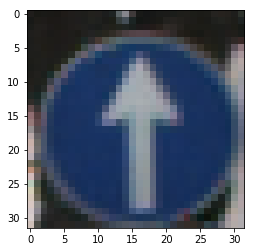

visualize the conv layer1
INFO:tensorflow:Restoring parameters from model/shoo.ckpt


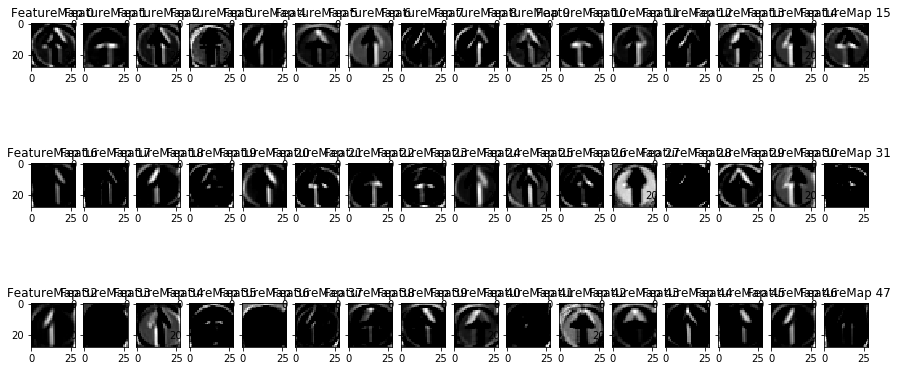

In [39]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob:1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,16, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
test_item = 11
img = GTSRB_X[test_item,:,:,:]            
image_input = np.expand_dims(norm_GTSRB_X[test_item,:,:,:],axis=0)
figure = plt.plot()
plt.imshow(img)
plt.show()

print('visualize the conv layer1')
model_path = 'model/shoo.ckpt'
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,model_path)
    outputFeatureMap(image_input,conv1, activation_min=-1, activation_max=-1 ,plt_num=1)            
                                    


In [40]:
#show the tensor name in the model 
model_path = 'model/shoo.ckpt'
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,model_path)
    graph = tf.get_default_graph()
    for v in tf.get_collection(tf.GraphKeys. GLOBAL_VARIABLES):
        layer = graph.get_tensor_by_name(v.name)
        print('layer name:%s, size = %s' %(v.name,layer.shape))

INFO:tensorflow:Restoring parameters from model/shoo.ckpt
layer name:ShooNet/conv1/conv_weight:0, size = (5, 5, 3, 48)
layer name:ShooNet/conv1/conv_bias:0, size = (48,)
layer name:ShooNet/conv2/conv_weight:0, size = (5, 5, 48, 96)
layer name:ShooNet/conv2/conv_bias:0, size = (96,)
layer name:ShooNet/conv3/conv_weight:0, size = (3, 3, 96, 172)
layer name:ShooNet/conv3/conv_bias:0, size = (172,)
layer name:ShooNet/fc_weight:0, size = (688, 344)
layer name:ShooNet/fc_bias:0, size = (344,)
layer name:ShooNet/fc_weight_1:0, size = (344, 172)
layer name:ShooNet/fc_bias_1:0, size = (172,)
layer name:ShooNet/fc_weight_2:0, size = (172, 86)
layer name:ShooNet/fc_bias_2:0, size = (86,)
layer name:ShooNet/fc_weight_3:0, size = (86, 43)
layer name:ShooNet/fc_bias_3:0, size = (43,)
layer name:beta1_power:0, size = ()
layer name:beta2_power:0, size = ()
layer name:ShooNet/conv1/conv_weight/Adam:0, size = (5, 5, 3, 48)
layer name:ShooNet/conv1/conv_weight/Adam_1:0, size = (5, 5, 3, 48)
layer name:Sh